This notebook shows the use of embeddings, specifically in NLP

An embedding vector is a dense, continuous vector representation of discrete objects, such as words, sentences, or even images. These vectors are typically generated using machine learning models and are designed to capture the semantic meaning of the objects they represent in a multi-dimensional space.

Dimensionality: The embedding vector has a fixed number of dimensions (e.g., 50, 100, 300). Each dimension represents a feature of the object, and the values in the vector indicate how much the object aligns with that feature.

Semantic Similarity: Objects with similar meanings or properties are represented by vectors that are close to each other in the embedding space. For example, in a word embedding space, the vectors for "king" and "queen" would be closer to each other than to "dog."

Training Methods:

Word2Vec: Generates word embeddings by predicting words in a context (CBOW) or by predicting the context from a word (Skip-gram).
GloVe (Global Vectors for Word Representation): Combines the advantages of matrix factorization and context-based methods.
Transformers (like BERT): Modern approaches use transformer models to create embeddings that consider the context of words within entire sentences.
Applications:

Natural Language Processing (NLP): Word, sentence, or document embeddings are used in tasks like text classification, sentiment analysis, and machine translation.
Recommendation Systems: Product or user embeddings help in making personalized recommendations.
Computer Vision: Image embeddings are used in tasks like image retrieval, object detection, and more.
Embedding Spaces: The idea is that relationships between objects can be expressed as linear relationships in this space. For example, the relationship between "man" and "woman" can be captured as a vector difference that is similar to the difference between "king" and "queen."

gensim documents
https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html

In [1]:
# Install the Gensim library if not already installed
!pip install gensim

  Using cached wrapt-1.16.0-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 932.9 kB/s eta 0:00:26
   - -------------------------------------- 0.8/24.0 MB 932.9 kB/s eta 0:00:25
   - -------------------------------------- 0.8/24.0 MB 932.9 kB/s eta 0:00:25
   - -------------------------------------- 1.0/24.0 MB 968.5 kB/s eta 0:00:24
   -- ------------------------------------- 1.3/24.0 MB 1.0 MB/s eta 0:00:23
   -- ------------------------------------- 1.6/24.0 MB 1.0 MB/s eta 0:00:22
   --- ------------------------------------ 1.8/24.0 MB 1.0 MB/s eta 0:00:22
   --- ------------------------------------ 2.1/24.0 MB 1.1 MB/s eta 0:00:21
   --- ------------------------------------ 2.4/24.0 MB 1.1 MB/s eta 0:00:21
   ---- ---------

In [7]:
!python -m pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.0 MB 5.4 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.0 MB 5.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 5.7 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 5.4 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 5.5 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 5.6 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.7 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp311-cp311-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl (7.8 MB)
Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl (188 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)


In [8]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import gensim.downloader
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# We can chose any of these models to download
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

We chose the smallest `glove-twitter-25` which is a GloVe model trained to learn 25-dimensional vector embeddings

In [10]:
# Load pre-trained glove model (this could be a large pre-trained model)
word2vec_model = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [11]:
# Select a few words for visualization
words_to_visualize = [
    'king', 'queen', 'apple', 'jack', 'ten', 'nine',
    'eight', 'seven', 'six', 'chair', 'lamp', 'desk',
    'orange', 'bannana', 'cherry', 'plum'
  ]

In [12]:
# Extract embeddings for selected words
word_embeddings = np.array([word2vec_model[word] for word in words_to_visualize])

In [13]:
word_embeddings[0] # This is the embedding for 'king'

array([-0.74501 , -0.11992 ,  0.37329 ,  0.36847 , -0.4472  , -0.2288  ,
        0.70118 ,  0.82872 ,  0.39486 , -0.58347 ,  0.41488 ,  0.37074 ,
       -3.6906  , -0.20101 ,  0.11472 , -0.34661 ,  0.36208 ,  0.095679,
       -0.01765 ,  0.68498 , -0.049013,  0.54049 , -0.21005 , -0.65397 ,
        0.64556 ], dtype=float32)

In [14]:
word_embeddings[1] # This is the embedding for 'queen'

array([-1.1266  , -0.52064 ,  0.45565 ,  0.21079 , -0.05081 , -0.65158 ,
        1.1395  ,  0.69897 , -0.20612 , -0.71803 , -0.02811 ,  0.10977 ,
       -3.3089  , -0.49299 , -0.51375 ,  0.10363 , -0.11764 , -0.084972,
        0.02558 ,  0.6859  , -0.29196 ,  0.4594  , -0.39955 , -0.40371 ,
        0.31828 ], dtype=float32)

In [15]:
word_embeddings[2] # This is the embedding for 'apple'

array([ 0.85337  ,  0.011645 , -0.033377 , -0.31981  ,  0.26126  ,
        0.16059  ,  0.010724 , -0.15542  ,  0.75044  ,  0.10688  ,
        1.9249   , -0.45915  , -3.3887   , -1.2152   , -0.054263 ,
       -0.20555  ,  0.54706  ,  0.4371   ,  0.25194  ,  0.0086557,
       -0.56612  , -1.1762   ,  0.010479 , -0.55316  , -0.15816  ],
      dtype=float32)

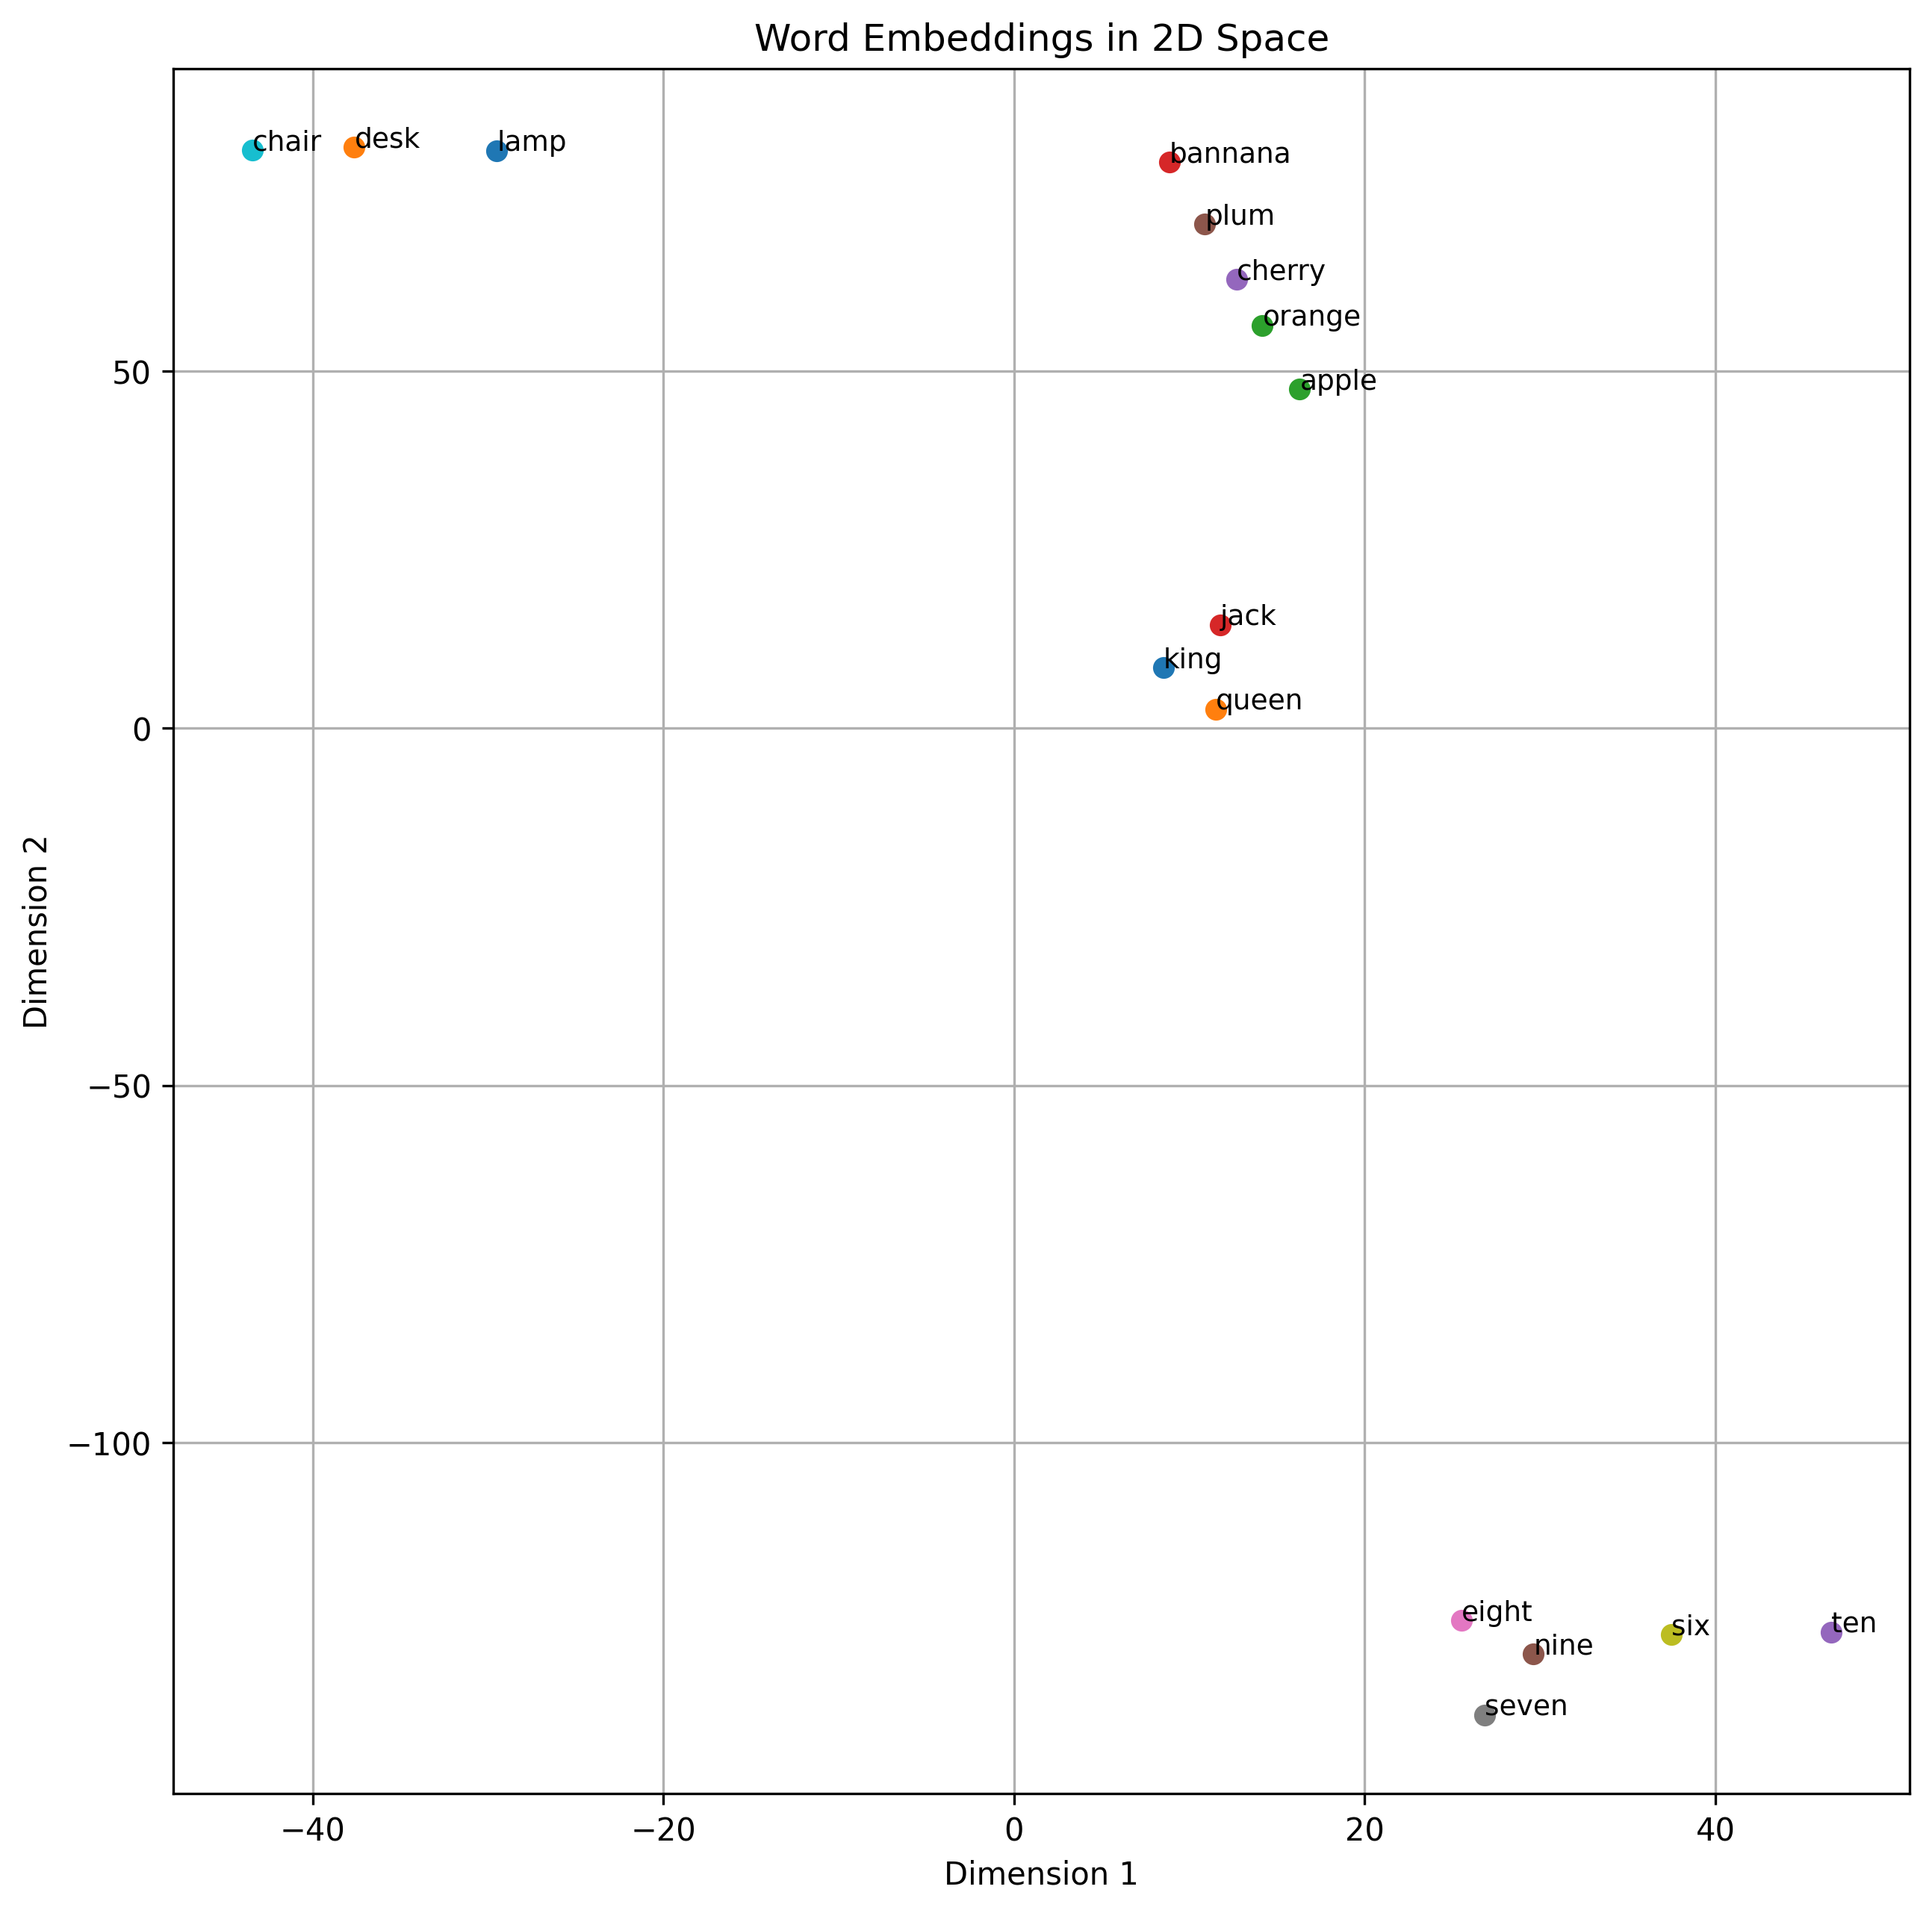

Cosine Similarity (king, queen): 0.920242190361023
Cosine Similarity (king, apple): 0.6321312189102173
Cosine Similarity (queen, apple): 0.5208228826522827


In [16]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (10,10)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
embeddings_2d = tsne.fit_transform(word_embeddings)

# Plotting the word embeddings in a 2-dimensional space
for i, word in enumerate(words_to_visualize):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.text(embeddings_2d[i, 0] + 0.01, embeddings_2d[i, 1] + 0.01, word, fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings in 2D Space')
plt.grid(True)
plt.show()

# Calculate the cosine similarity between "king" and "queen" compared to "apple"
cosine_similarity_king_queen = word2vec_model.similarity('king', 'queen')
cosine_similarity_king_apple = word2vec_model.similarity('king', 'apple')
cosine_similarity_queen_apple = word2vec_model.similarity('queen', 'apple')

print(f"Cosine Similarity (king, queen): {cosine_similarity_king_queen}")
print(f"Cosine Similarity (king, apple): {cosine_similarity_king_apple}")
print(f"Cosine Similarity (queen, apple): {cosine_similarity_queen_apple}")